In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df=pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


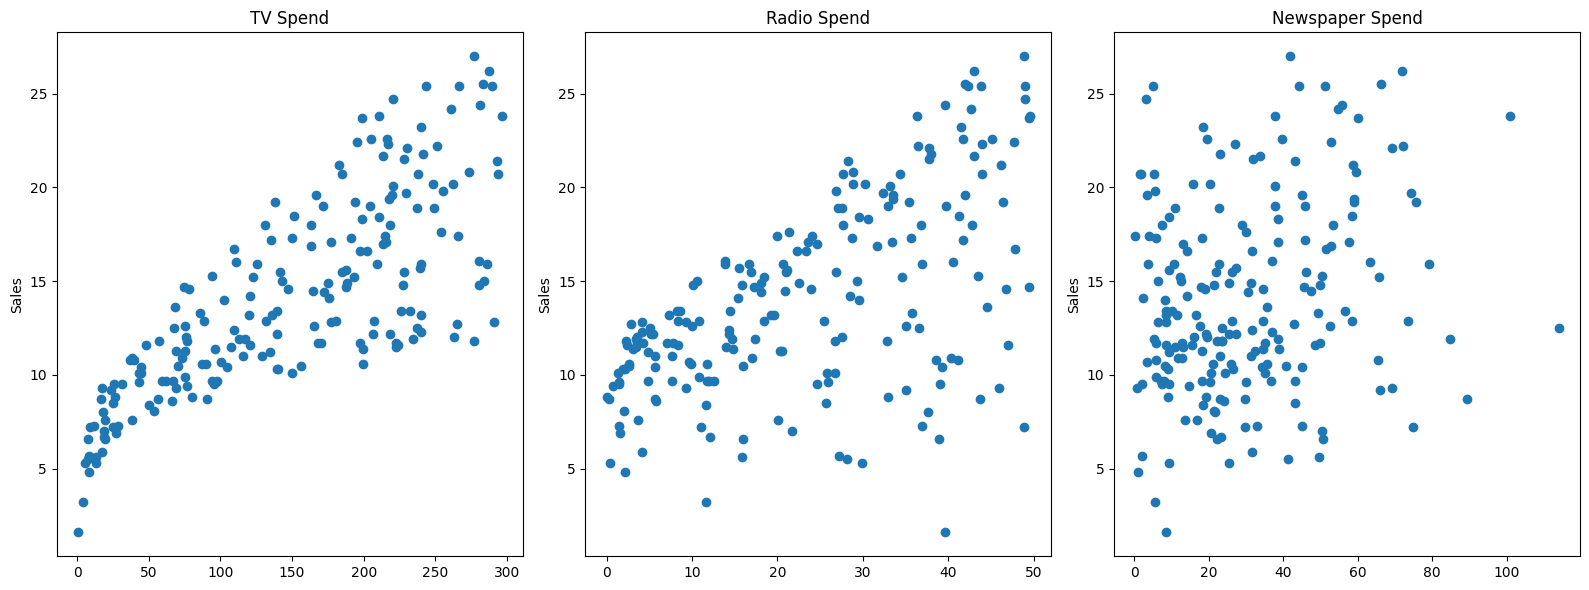

In [4]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [5]:
X=df.drop('sales',axis=1) #Using this
y=df['sales'] #We have to predict this

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [7]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [8]:
y_pred=regressor.predict(X_test)

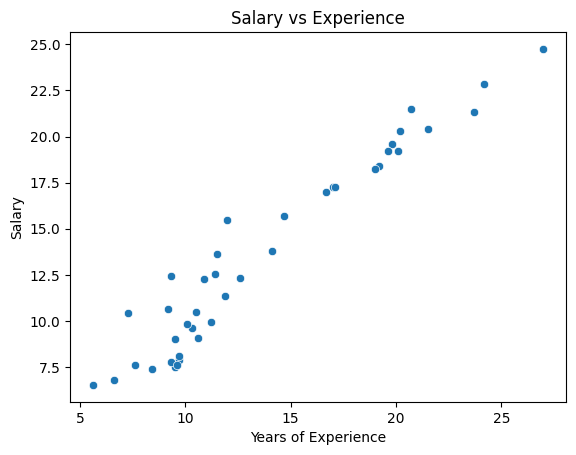

In [9]:
#*Plotting for training set
sns.scatterplot(x=y_test, y=y_pred)
plt.title("Salary vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

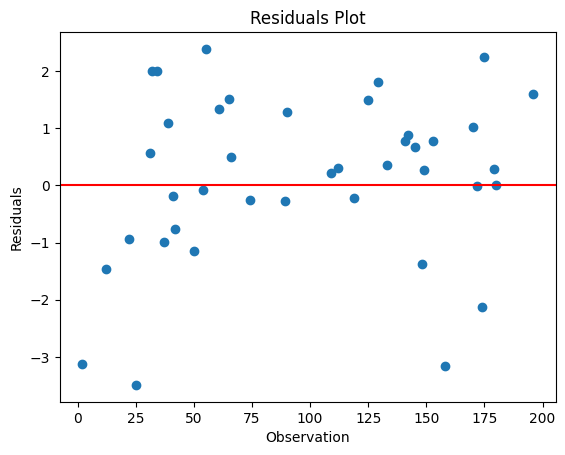

In [10]:
residuals = y_test - y_pred
plt.plot(residuals, marker='o', linestyle='None')
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0 for reference
plt.xlabel("Observation")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

In [11]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
print("Mean absolute error is: ",mae)
mse=mean_squared_error(y_test,y_pred)
print("Mean squred error is:",mse)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("oot mean squred error is:",rmse)

Mean absolute error is:  1.1244750006255653
Mean squred error is: 2.063418850121476
oot mean squred error is: 1.43646052856369


In [12]:
print(f'Coefficients: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficients: [0.04532832 0.18994063 0.00027396]
Intercept: 2.901313692873174


In [13]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [14]:
def mean_absolute_percentage_error(y_test, y_pred):
    errors = np.abs((y_test - y_pred) / y_test)
    mape = np.mean(errors) * 100
    return mape

# Assuming y_actual and y_pred are your actual and predicted values
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 9.93%


In [15]:
def mean_squared_percentage_error(y_actual, y_pred):
    errors = ((y_actual - y_pred) ** 2) / (y_actual ** 2)
    mspe = np.mean(errors) * 100
    return mspe

# Assuming y_actual and y_pred are your actual and predicted values
mspe = mean_squared_percentage_error(y_test, y_pred)
print(f"Mean Squared Percentage Error (MSPE): {mspe:.2f}%")


Mean Squared Percentage Error (MSPE): 1.92%


In [16]:
def root_mean_squared_percentage_error(y_actual, y_pred):
    errors = ((y_actual - y_pred) ** 2) / (y_actual ** 2)
    rmspe = np.sqrt(np.mean(errors)) * 100
    return rmspe

# Assuming y_actual and y_pred are your actual and predicted values
mspe = root_mean_squared_percentage_error(y_test, y_pred)
print(f"Root Mean Squared Percentage Error (RMSPE): {mspe:.2f}%")

Root Mean Squared Percentage Error (RMSPE): 13.85%


In [17]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)

print(f"R-squared: {r_squared:.2f}")


R-squared: 0.93
